# 필요한 Tool import하기

In [208]:
#필요한 tool들 import하기.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
from sklearn.neural_network import MLPClassifier
from io import StringIO 

#graphviz를 사용하기 위해서 graphviz를 path에 추가.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [4]:
#mushroom_csv파일의 위치 정보를 mushroom_path에 저장한다.
mushroom_path = './mushroom.csv'
#mushroom에 mushroom_csv파일을 저장한다.
mushroom = pd.read_csv(mushroom_path)

In [5]:
#wine_csv파일의 위치 정보를 wine_path에 저장한다.
wine_path = 'winequalityN.csv'
#wine에 wine_csv파일을 저장한다.
wine = pd.read_csv(wine_path)

# 2.1.2 python사용하여 MushroomData 분석

In [6]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-adove-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [8]:
#mushroom의 특징을 살펴보자.
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-adove-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
#mushroom의 attribute의 type을 알아보자 
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-adove-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [14]:
#이제 각 attribute에 value가 무엇이 있고 또 몇 개가 잇는지 알아보자.
num_variable = 0
for col in mushroom.columns:
    x_value = mushroom[col].unique()
    y_value = mushroom[col].value_counts()
    print("< " + col + " >")
    print(y_value)
    print("\n")
    

< class >
e    4208
p    3916
Name: class, dtype: int64


< cap-shape >
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


< cap-surface >
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


< cap-color >
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64


< bruises >
f    4748
t    3376
Name: bruises, dtype: int64


< odor >
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64


< gill-attachment >
f    7914
a     210
Name: gill-attachment, dtype: int64


< gill-spacing >
c    6812
w    1312
Name: gill-spacing, dtype: int64


< gill-size >
b    5612
n    2512
Name: gill-size, dtype: int64


< gill-color >
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


< stalk-shape >
t    4608
e 

# 2.1.2 python사용하여 WineData 분석

In [15]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,white,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
9,white,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6


In [47]:
#wine의 data type
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
#wine의 특징을 살펴보자.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


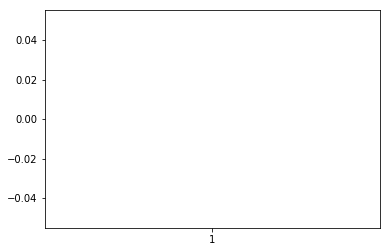

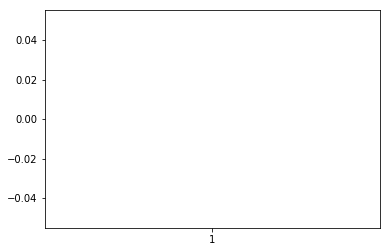

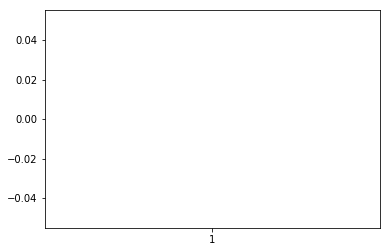

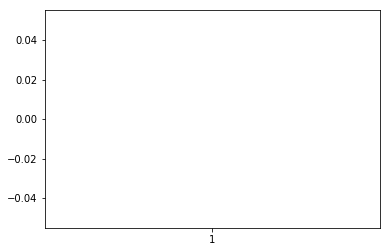

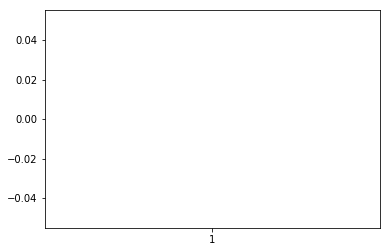

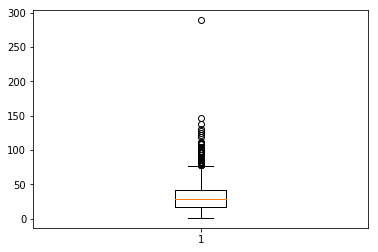

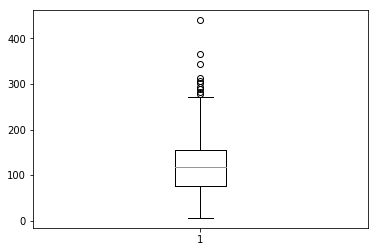

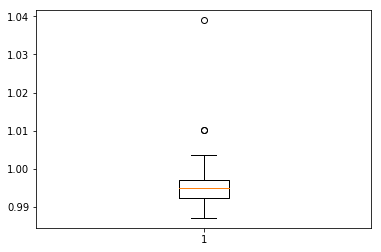

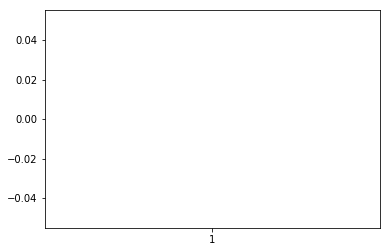

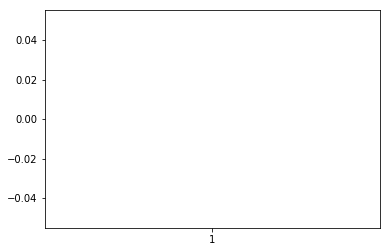

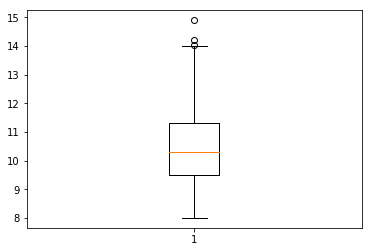

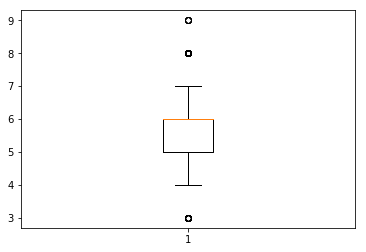

In [41]:
#wine attribute visualize boxplot으로 visualize하기.
for col in wine.columns:
    if col != "type":
        plt.figure()
        plt.boxplot(wine[col])
        print(col)

In [43]:
#missing value값들 찾고 없애기
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [48]:
wine = wine.dropna()

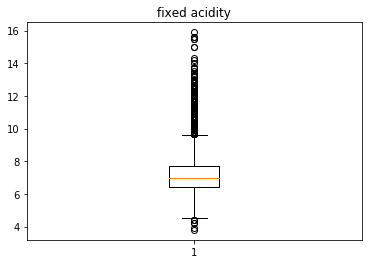

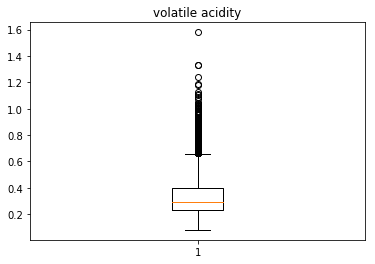

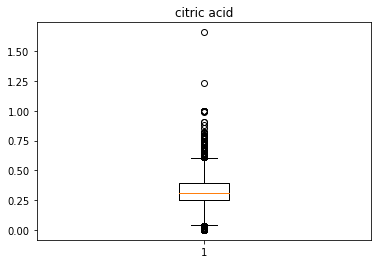

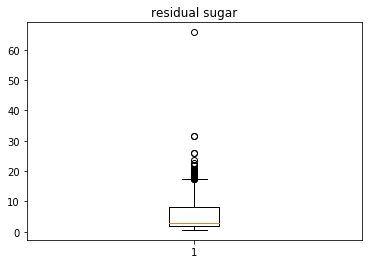

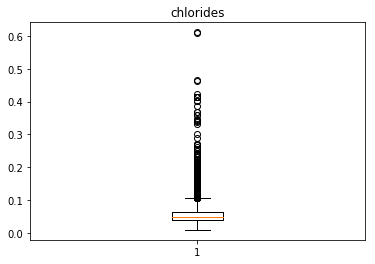

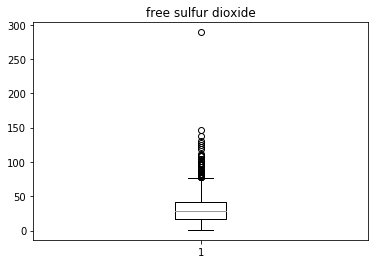

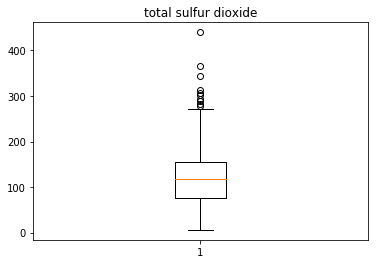

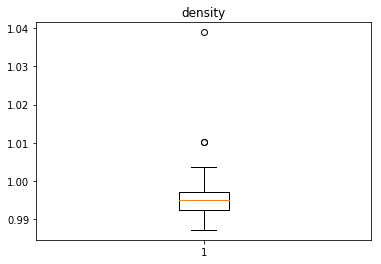

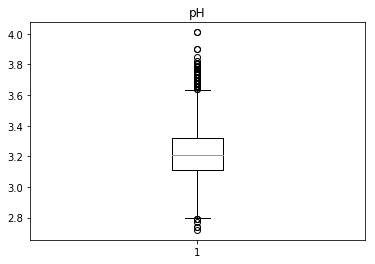

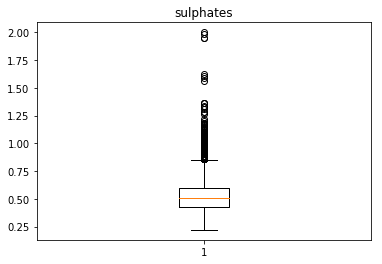

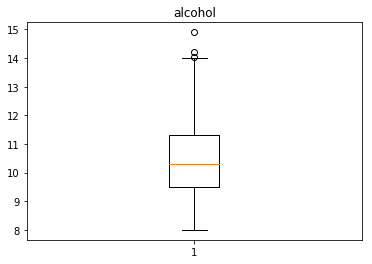

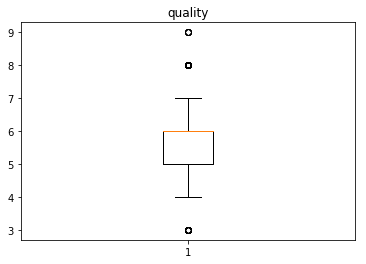

In [51]:
#wine attribute visualize boxplot으로 visualize하기.
for col in wine.columns:
    if col != "type":
        plt.figure()
        plt.title(col)
        plt.boxplot(wine[col])

# Mushroom data set을 사용하여 모델 학습

In [52]:
#먼저 label class를 정해준다. 
#mushroom의 경우 class를 label로 정한다.
mushroom_x = mushroom.drop(columns='class')
mushroom_y = mushroom['class']

In [59]:
#mushroom_x의 경우 categorical한 data를 numerical한 data로 바꾼다.
mushroom_x = pd.get_dummies(mushroom_x)
mushroom_x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [212]:
#각 model을 train하는 함수를 만든다.

def trainDeicisionTree(x,y):
    decision = DecisionTreeClassifier('entropy')
    decision.fit(x,y)
    score = decision.score(x,y)
    
    return decision, score

def trainLogistic(x,y):
    lr = LogisticRegression()
    lr.fit(x,y)
    score = lr.score(x,y)
    
    return lr, score

def trainMLP(x,y):
    mlp = MLPClassifier((20,),activation='logistic')
    mlp.fit(x,y)
    score = mlp.score(x,y)
    
    return mlp,score

In [213]:
#decision tree를 학습
mush_decisionTree, mush_decision_train_score = trainDeicisionTree(mushroom_x, mushroom_y)
print(mush_decision_train_score)

1.0


In [214]:
#logistic을 학습
mush_logistic, mush_logistic_train_score = trainLogistic(mushroom_x, mushroom_y)
print(mush_logistic_train_score)

1.0


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [215]:
#MLP 학습
mush_MLP, mush_MLP_train_score = trainMLP(mushroom_x, mushroom_y)
print(mush_MLP_train_score)

1.0


# wine data set을 사용하여 모델 학습

In [216]:
#type을 label로 정한다.
wine_y = wine['type']
wine_x = wine.drop(columns='type')

In [217]:
wine_y

0       white
1       white
2       white
3       white
4       white
5       white
6       white
7       white
8       white
9       white
10      white
11      white
12      white
13      white
14      white
15      white
16      white
18      white
19      white
20      white
21      white
22      white
23      white
24      white
25      white
26      white
27      white
28      white
29      white
30      white
        ...  
6465      red
6466      red
6467      red
6468      red
6469      red
6470      red
6471      red
6472      red
6473      red
6474      red
6475      red
6476      red
6477      red
6478      red
6479      red
6480      red
6481      red
6482      red
6483      red
6484      red
6485      red
6487      red
6488      red
6489      red
6490      red
6491      red
6492      red
6494      red
6495      red
6496      red
Name: type, Length: 6463, dtype: object

In [218]:
wine_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6


In [219]:
#wine_y의 경우 numerical data가 아니기 때문에 학습이 되지 않는다.
#그래서 wine_y를 numerical data로 바꿔준다.
wine_y = wine_y.astype('category').cat.codes

In [220]:
wine_y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
       ..
6465    0
6466    0
6467    0
6468    0
6469    0
6470    0
6471    0
6472    0
6473    0
6474    0
6475    0
6476    0
6477    0
6478    0
6479    0
6480    0
6481    0
6482    0
6483    0
6484    0
6485    0
6487    0
6488    0
6489    0
6490    0
6491    0
6492    0
6494    0
6495    0
6496    0
Length: 6463, dtype: int8

In [221]:
#decision tree를 학습시킨다.
wine_decisionTree, wine_decision_train_score = trainDeicisionTree(wine_x, wine_y)
print(wine_decision_train_score)

0.9996905461859817


In [222]:
#logistic을 학습시킨다.
wine_logistic, wine_logistic_train_score = trainLogistic(wine_x, wine_y)
print(wine_logistic_train_score)

0.9829800402289959


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [223]:
#MLP를 학습시킨다.
wine_MLP, wine_MLP_train_score = trainMLP(wine_x, wine_y)
print(wine_MLP_train_score)

0.9853009438341328


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# cross-validation을 사용하여 모델 평가

In [224]:
#먼저 cross-validation을 사용하기 위해 kFold를 선언한다.
kfold = KFold(n_splits=5)

mushroom dataset의 모델 먼저 평가한다.

In [225]:
#mushroom data set decision tree
mush_decision_accuracy = cross_val_score(DecisionTreeClassifier(), mushroom_x, mushroom_y, cv=kfold)
print(mush_decision_accuracy)

[1.         1.         1.         0.99630769 0.99014778]


In [226]:
#mushroom data set Logistic
mush_logistic_accuracy = cross_val_score(LogisticRegression(), mushroom_x, mushroom_y, cv=kfold)
print(mush_logistic_accuracy)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.97107692 1.         1.         0.95692308 0.99753695]


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
#mushroom data set MLP
mush_MLP_accuracy = cross_val_score(MLPClassifier(), mushroom_x, mushroom_y, cv=kfold)
print(mush_MLP_accuracy)

[0.99446154 1.         1.         0.99876923 0.99753695]


In [228]:
#wine data set DecisionTree
wine_decision_accuracy = cross_val_score(DecisionTreeClassifier(), wine_x, wine_y, cv=kfold)
print(wine_decision_accuracy)

[0.98143852 0.98685228 0.9837587  0.97291022 0.84055728]


In [229]:
#wine data set Logistic
wine_logistic_accuracy = cross_val_score(LogisticRegression(), wine_x, wine_y, cv=kfold)
print(wine_logistic_accuracy)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[0.97911833 0.98917247 0.98917247 0.97678019 0.85371517]


In [230]:
#wine data set MLP
wine_MLP_accuracy = cross_val_score(MLPClassifier(), wine_x, wine_y, cv=kfold)
print(wine_MLP_accuracy)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.98066512 0.99690642 0.98530549 0.97832817 0.94272446]


# 실험 데이터 분석 및 결론

mushroom data set Fit 분석

In [231]:
#mushroom의 accuracy의 평균을 구한다.
mush_decision_accuracy = sum(mush_decision_accuracy)/5
mush_logistic_accuracy = sum(mush_logistic_accuracy)/5
mush_MLP_accuracy = sum(mush_MLP_accuracy)/5
print(mush_decision_accuracy)
print(mush_logistic_accuracy)
print(mush_MLP_accuracy)

0.9972910951117848
0.9851073891625616
0.9981535430087154


In [232]:
#mushroom의 모델의 train_accuray와 accuracy의 차이를 구한다.
mush_decision_accuracy_diff = mush_decision_train_score - mush_decision_accuracy
mush_logistic_accuracy_dff = mush_logistic_train_score - mush_logistic_accuracy
mush_MLP_accuracy_diff = mush_MLP_train_score - mush_MLP_accuracy

In [233]:
print(mush_decision_accuracy_diff)
print(mush_logistic_accuracy_dff)
print(mush_MLP_accuracy_diff)

0.00270890488821518
0.014892610837438425
0.0018464569912846063


wine data Fit 분석

In [234]:
#wine의 accuracy의 평균을 구한다.
wine_decision_accuracy = sum(wine_decision_accuracy)/5
wine_logistic_accuracy = sum(wine_logistic_accuracy)/5
wine_MLP_accuracy = sum(wine_MLP_accuracy)/5
print(wine_decision_accuracy)
print(wine_logistic_accuracy)
print(wine_MLP_accuracy)

0.9531033979106358
0.9575917239529833
0.9767859323482719


In [235]:
#wine의 모델의 train_accuray와 accuracy의 차이를 구한다.
wine_decision_accuracy_diff = wine_decision_train_score - mush_decision_accuracy
wine_logistic_accuracy_dff = wine_logistic_train_score - mush_logistic_accuracy
wine_MLP_accuracy_diff = wine_MLP_train_score - mush_MLP_accuracy

In [236]:
print(wine_decision_accuracy_diff)
print(wine_logistic_accuracy_dff)
print(wine_MLP_accuracy_diff)

0.0023994510741969233
-0.002127348933565698
-0.01285259917458259


mushroom data 분석

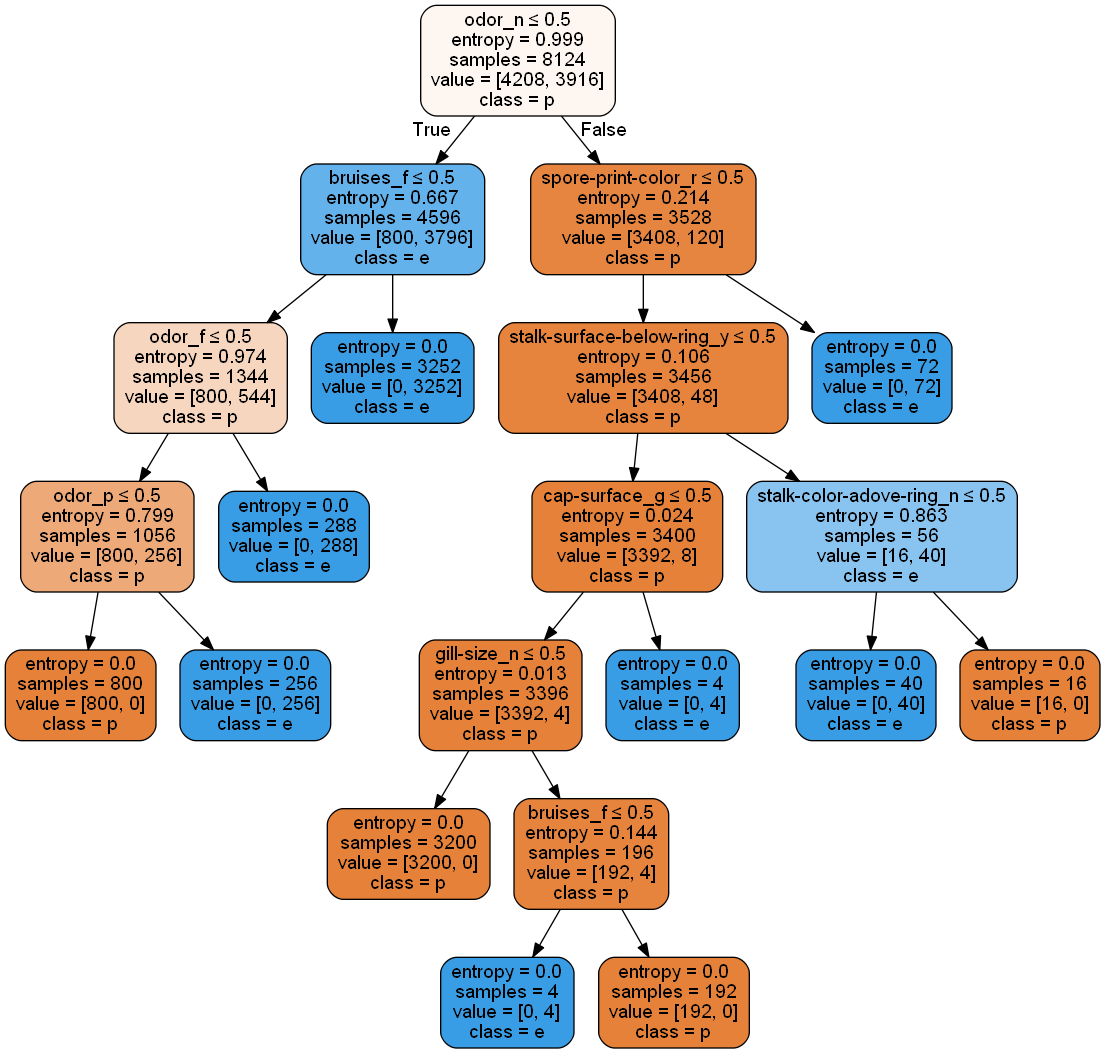

In [242]:
dot_data = StringIO()

export_graphviz(mush_decisionTree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=mushroom_x.columns, class_names=mushroom_y.unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [243]:
mush_logistic.coef_

array([[ 2.67728826e-01,  5.29563092e-01,  3.96625561e-02,
        -3.07666180e-02, -5.66808792e-01, -8.30172740e-02,
        -7.15404561e-01,  7.94655477e-01,  1.59053351e-01,
        -8.19424778e-02,  1.05199565e+00, -7.39804327e-01,
        -1.67798255e-03,  1.25280492e-01, -4.32029939e-01,
         1.02761549e+00, -4.93937727e-01, -4.93937727e-01,
         4.80108905e-01, -3.67251044e-01, -4.51826605e-01,
         6.08188395e-01, -3.50724881e+00,  3.67032325e+00,
         3.57730608e+00, -3.50724881e+00,  3.55846442e-01,
        -4.08363408e+00,  2.06491339e+00,  7.93052168e-01,
         7.93052168e-01, -2.21518453e-01,  3.77880243e-01,
         1.14881725e+00, -9.92455460e-01, -2.17954759e+00,
         2.33590938e+00,  1.62522048e+00, -6.10886672e-01,
         1.76946112e-02,  1.60484224e-01, -5.24677122e-01,
        -6.12447634e-01, -1.50971403e-01, -3.72110798e-01,
         8.03928316e-01, -1.53720251e-01, -1.67642715e-01,
         1.41490755e-01,  5.00303330e-01, -3.43941541e-0

wine data set Fit 분석

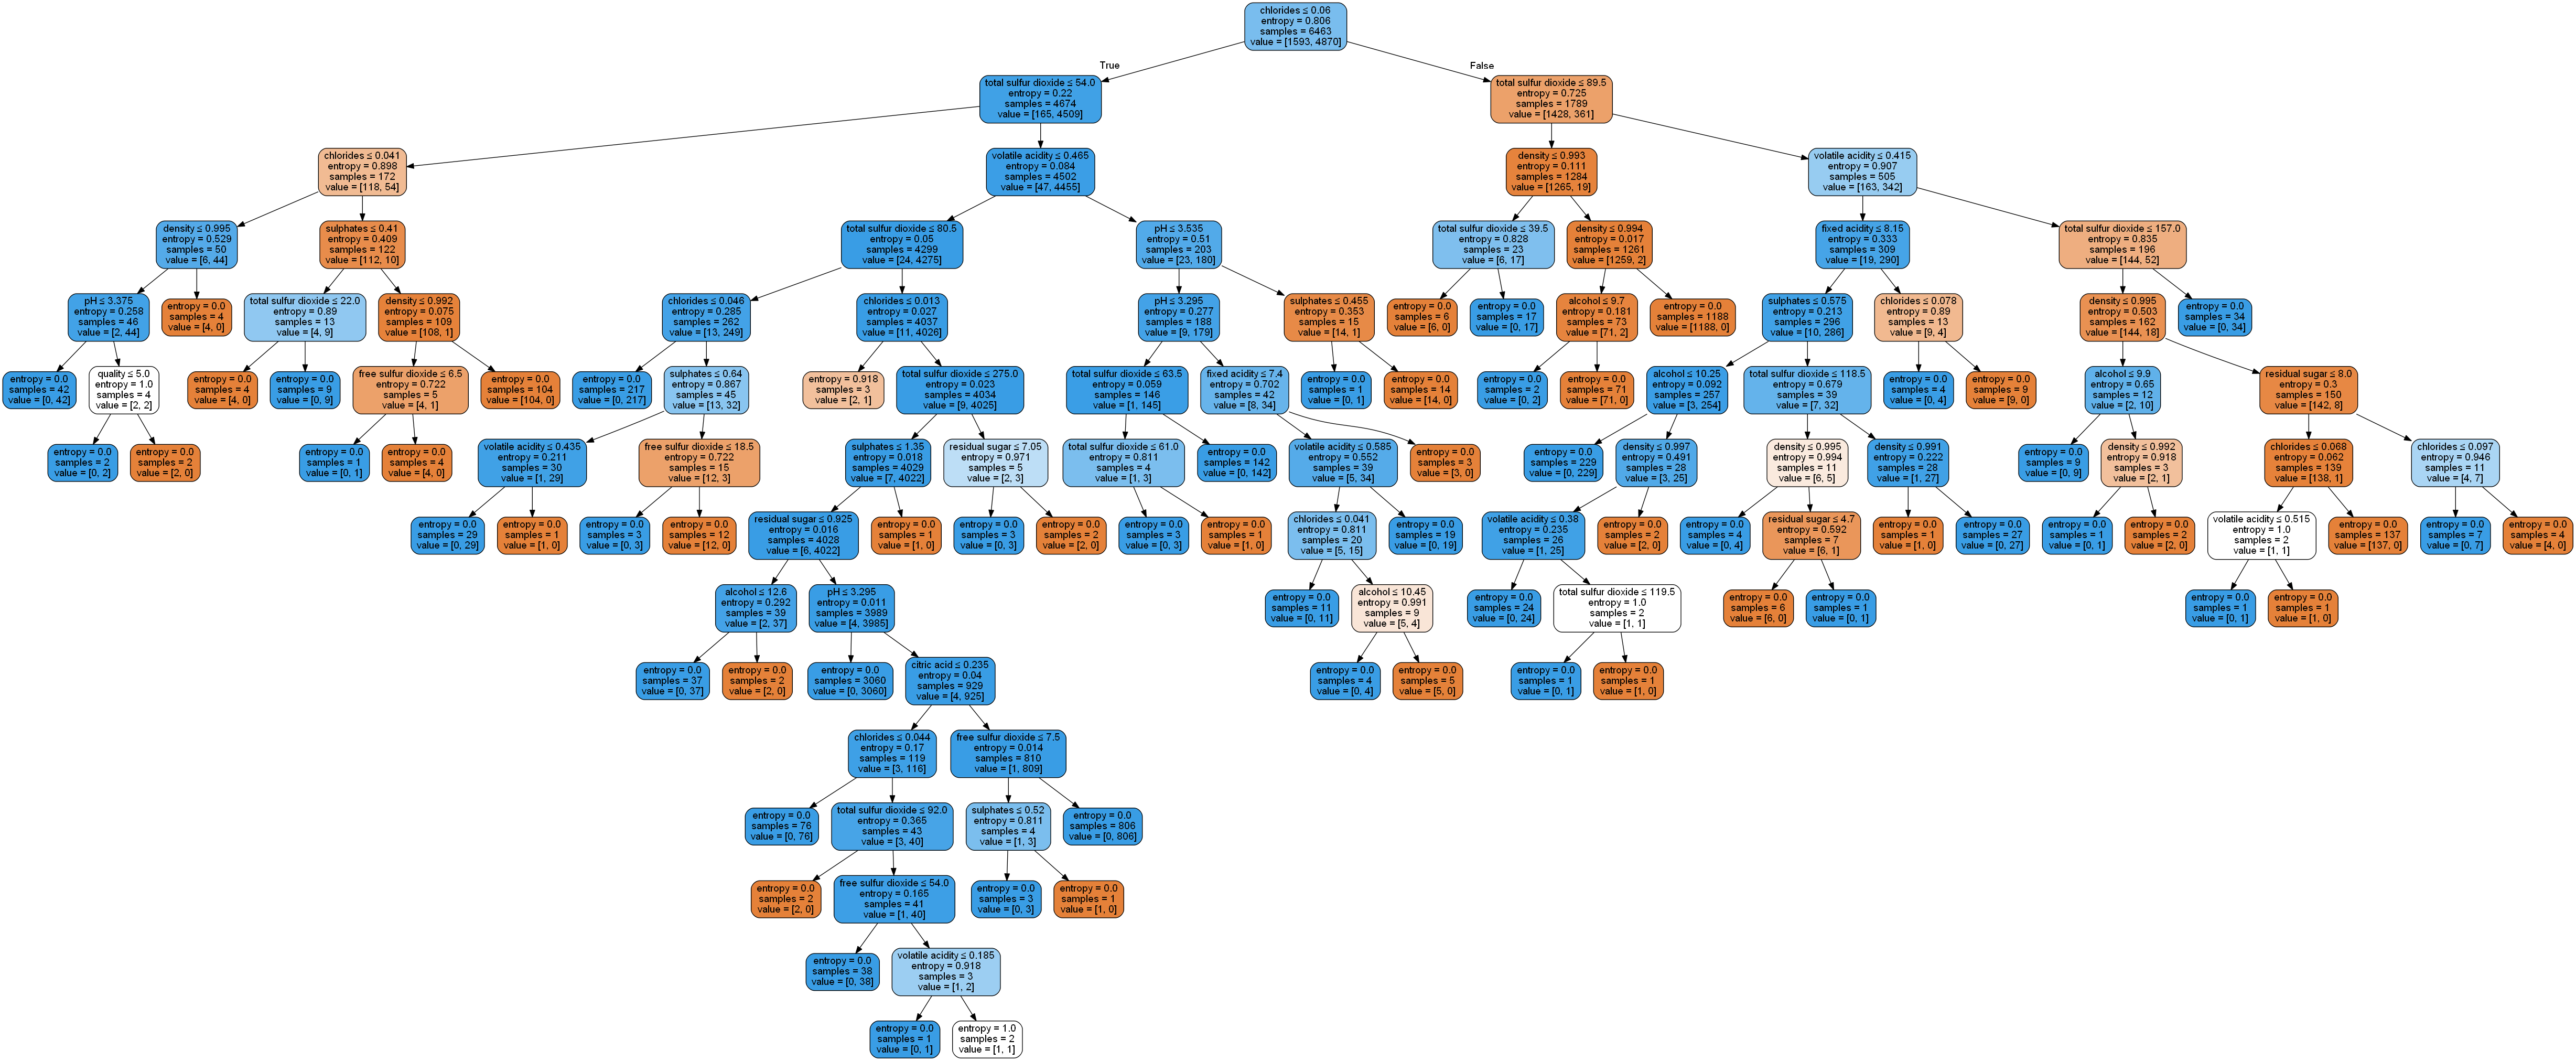

In [247]:
dot_data = StringIO()

export_graphviz(wine_decisionTree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=wine_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [248]:
wine_logistic.coef_

array([[-0.6967204 , -8.55680715,  0.55973962,  0.14705301, -3.0349902 ,
        -0.04595183,  0.06198794,  3.77815727, -2.53789427, -6.80105436,
         0.773723  ,  0.07956918]])